Comparing my methods with Nx build in functions

(34, 78)

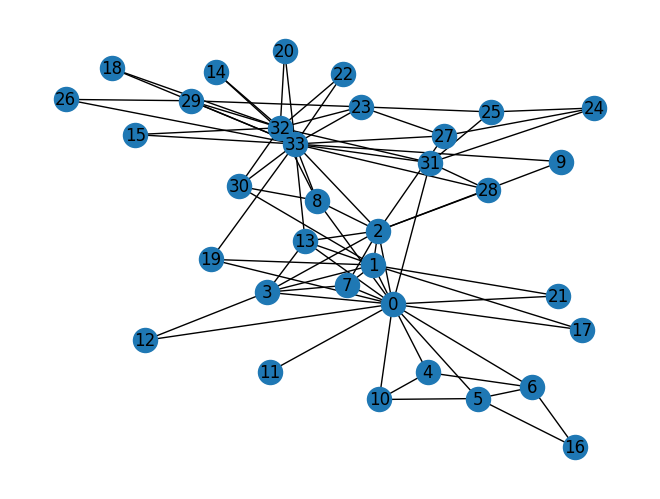

In [2]:
import networkx as nx
# Example Dataset for our tests
G = nx.karate_club_graph()
nx.draw(G, with_labels = True)

len(G.nodes), len(G.edges)


Running Girvan-Newman Algorithm...

[DEBUG] Iteration 0: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 2)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEBUG] Iteration 1: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 8)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEBUG] Iteration 2: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 31)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEBUG] Iteration 3: Calculating betweenness centrality...
[DEBUG] Removed edge: (13, 33)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 8, 30, 32, 14, 33, 9, 15, 18, 19, 20, 23, 25, 24, 27, 31, 28, 29, 26, 22, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEB

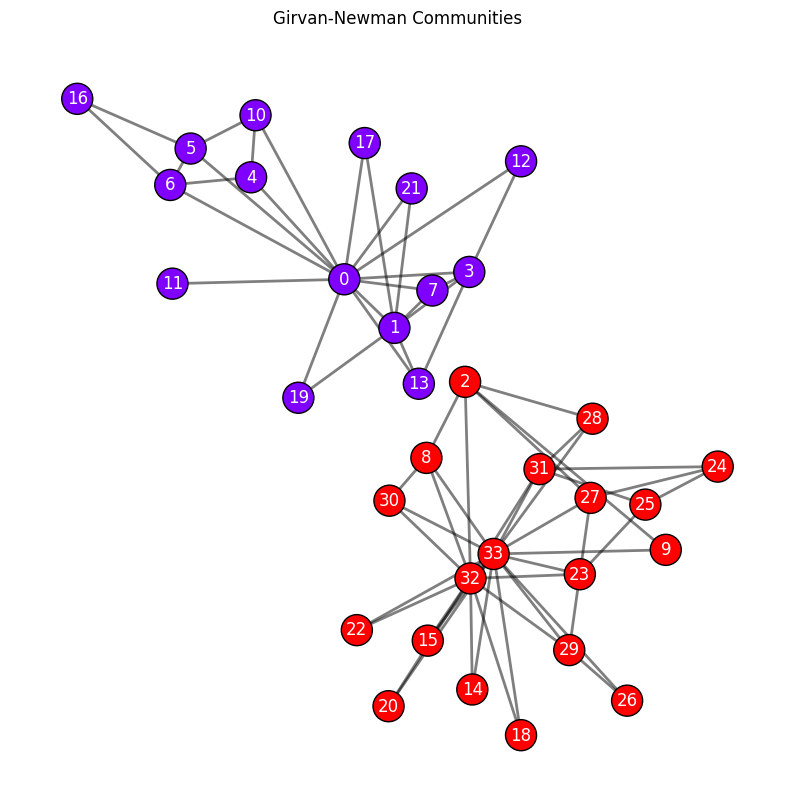

In [ ]:
# How our algorithms works
from functions import *
betweenness_method = "dijkstra"  # Options: "bfs", "dijkstra"
component_method = "dfs_recursive"  # Options: "dfs_recursive", "dfs_iterative"

print("\nRunning Girvan-Newman Algorithm...")
communities, removed_edges = Girvan_Newman_methods(G, betweenness_method, component_method)

# Visualize Results
visualize_communities(G, communities, removed_edges)


In [ ]:
# --- Testing our custom implementation vs Nx based one ---
from test import Graph, test_algorithms
# --- Run Tests ---
if __name__ == "__main__":
    # Create a test graph
    nx_G = nx.karate_club_graph()
    edges = list(nx_G.edges())
    G = Graph(edges)  # Custom graph

    # Testing different methods
    methods = ["bfs", "dijkstra"]  # Betweenness centrality methods
    component_methods = ["dfs_recursive", "dfs_iterative"]  # Component finding methods

    for betweenness_method in methods:
        for component_method in component_methods:
            test_algorithms(G, betweenness_method, component_method)



 ⚠️--- Testing with Custom Method: bfs | Component Method: dfs_recursive ---

[DEBUG] Iteration 0: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 31)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 13, 3, 7, 12, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 17, 21, 4, 10, 5, 16, 6, 11]]

[DEBUG] Iteration 1: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 2)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 13, 3, 7, 12, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 17, 21, 4, 10, 5, 16, 6, 11]]

[DEBUG] Iteration 2: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 8)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 13, 3, 7, 12, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 17, 21, 4, 10, 5, 16, 6, 11]]

[DEBUG] Iteration 3: Calculating betweenness centrality...
[DEBUG] Removed edge: (13, 33)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 3, 7, 1

In [9]:
import networkx as nx

import time

# --- Testing Custom vs Pre-Implemented ---
if __name__ == "__main__":
    # Test Graph
    nx_G = nx.karate_club_graph()
    adj_matrix = nx.to_numpy_array(nx_G)

    # --- Custom Spectral Clustering ---
    print("\n--- Custom Spectral Clustering ---")
    start_time = time.time()
    custom_communities = spectral_clustering(G, k=2)
    end_time = time.time()
    custom_time = end_time - start_time
    print(f"⏱️ Custom Spectral Time: {custom_time:.6f} seconds")
    print("Custom Spectral Communities:", custom_communities)
    adj_matrix_spectral, nodes = G.adjacency_matrix()
    custom_modularity = calculate_modularity(adj_matrix_spectral, custom_communities)
    print(f"Custom Spectral Modularity: {custom_modularity:.6f}")

    # --- Pre-Implemented Spectral Clustering ---
    print("\n--- Pre-Implemented Spectral Clustering ---")
    start_time = time.time()
    spectral_communities = pre_implemented_spectral(nx_G, k=2)
    end_time = time.time()
    custom_time = end_time - start_time
    print(f"⏱️ Pre-Implemented Spectral Time: {custom_time:.6f} seconds")

    print("Pre-Implemented Spectral Communities:", spectral_communities)
    pre_modularity = calculate_modularity(adj_matrix_spectral, spectral_communities)
    print(f"Pre-Implemented Spectral Modularity: {pre_modularity:.6f}")

    # --- Run Comparisons ---
    print("\n--- Comparison Results ---")
    compare_methods(custom_communities, spectral_communities, "Spectral Clustering")

    # --- Custom Louvain ---
    print("\n--- Custom Louvain Method ---")
    start_time = time.time()
    edges_louvain = [(u, v, 1) for u, v in nx_G.edges()]
    end_time = time.time()
    custom_time = end_time - start_time
    print(f"⏱️ Custom Louvain Time: {custom_time:.10f} seconds")
    custom_louvain = louvain_cluster(adj_matrix, max_iter=15)
    print("Custom Louvain Communities:", custom_louvain)
    custom_modularity = calculate_modularity(adj_matrix, custom_louvain)
    print(f"Custom Louvain Modularity: {custom_modularity:.6f}")
    
    # --- Pre-Implemented Louvain ---
    print("\n--- Pre-Implemented Louvain Method ---")
    start_time = time.time()
    pre_louvain = pre_louvain_method(nx_G)
    end_time = time.time()
    custom_time = end_time - start_time
    print(f"⏱️ Pre-Implemented Louvain Time: {custom_time:.10f} seconds")
    print("Pre-Implemented Louvain Communities:", pre_louvain)
    pre_modularity = calculate_modularity(adj_matrix, pre_louvain)
    print(f"Pre-Implemented Louvain Modularity: {pre_modularity:.6f}")

    # --- Run Comparisons ---
    print("\n--- Comparison Results ---")
    compare_methods(custom_louvain, pre_louvain, "Louvain Clustering")
    # Compare Communities
    compare_communities_overlap(custom_louvain, pre_louvain, "Louvain Clustering")
    evaluate_community_metrics(adj_matrix, custom_communities, "Custom Louvain Clustering")


--- Custom Spectral Clustering ---
Sorted Eigenvalues: [-2.31483850e-16  1.32272329e-01  2.87048985e-01]
Converged at iteration 1
⏱️ Custom Spectral Time: 0.017996 seconds
Custom Spectral Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Custom Spectral Modularity: 0.371466

--- Pre-Implemented Spectral Clustering ---
⏱️ Pre-Implemented Spectral Time: 0.232586 seconds
Pre-Implemented Spectral Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Pre-Implemented Spectral Modularity: 0.371466

--- Comparison Results ---

--- Comparing Spectral Clustering ---
Custom Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Pre-Implemented Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15